In [25]:
# We're going to start off in a jupyter notebook and slowly move this into a widget... for visualization with tests and stuff
%matplotlib notebook
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv

In [26]:
data = sio.loadmat('/N/project/berkeley_walking/BerkeleyData/berkeley_pupilShadowMesh/s3_12_pupilShadowMesh.mat')
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'allPoints', 'cens', 'closestActualIndexDist', 'closestPrefIndexDist', 'eyeVec', 'fixBool', 'fixationList', 'frame_prefStepNum_XYZ', 'gazeXYZ', 'markerNames', 'shadow', 'step_plantfoot_xyz', 'y_flip', 'z_flip'])

In [35]:
environment_mesh = data['allPoints'] 
print(environment_mesh.shape) # num. of points x XYZ coordinates
skeleton = data['shadow'] # num of frames x num of pose landmarks x XYZ coordinates

markers = data['markerNames'];
hips = np.squeeze(skeleton[:,1,:])
print(skeleton.shape)
print(hips.shape)

footholds = data['step_plantfoot_xyz']
print(footholds.shape) # num of steps x [step #, foot that's down , XYZ coordinates]
gazeGround = data['gazeXYZ']
print(gazeGround.shape) # num of frames x XYZ coordinates;  it's where the gaze intersects the ground


(934290, 3)
(834, 30, 3)
(834, 3)
(46, 5)
(834, 3)


<IPython.core.display.Javascript object>


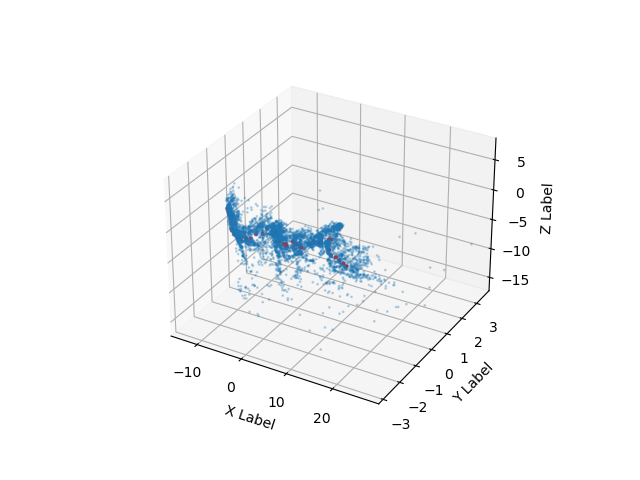

In [28]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud data
ax.scatter(environment_mesh[::200,0],environment_mesh[::200,1], environment_mesh[::200,2], s=1,alpha=.25)
ax.scatter(footholds[:,2],footholds[:,3],footholds[:,4],s=4,c='r')

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


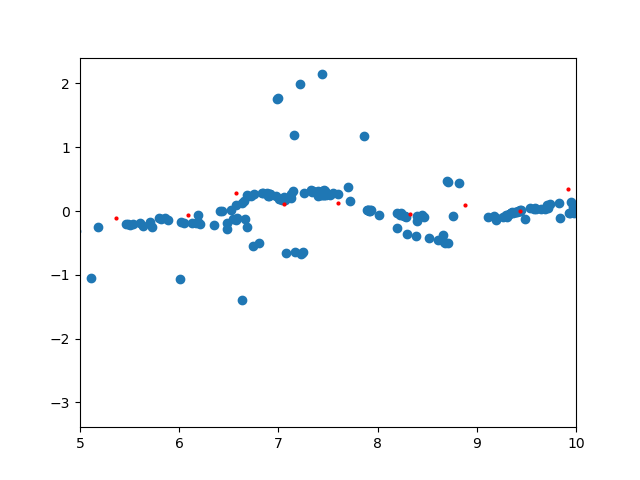

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot gaze points in the same figure as footholds
ax.scatter(gazeGround[:,0],gazeGround[:,2])
ax.scatter(footholds[:,2],footholds[:,4],s=4,c='r')
plt.xlim(5,10)
# Show the plot
plt.show()

<IPython.core.display.Javascript object>


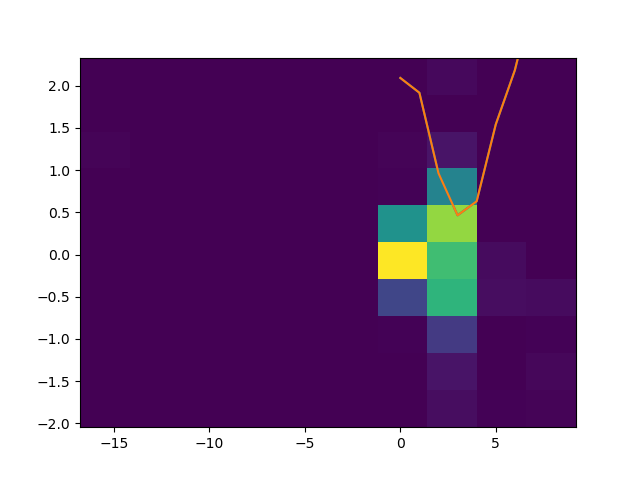

In [39]:
# scatter of gaze relative to current body position

fig = plt.figure()
ax = fig.add_subplot(111)

rel_gaze = gazeGround[:,0:3] - hips
# ax.scatter(rel_gaze[:,0],rel_gaze[:,2])
ax.hist2d(rel_gaze[:,0],rel_gaze[:,2])
plt.show()

In [43]:
# Eventual goal: a histogram of the gaze points around the upcoming footholds
# Goal right now: For every gaze point, how far is the nearest foothold?, what (#) is the near foothold?, 
#                 and what foothold (#) are you currently standing on?

from scipy.spatial.distance import cdist
distances = cdist(gazeGround,footholds[:,2:5])


(834, 46) (834, 3) (46, 3)


<IPython.core.display.Javascript object>


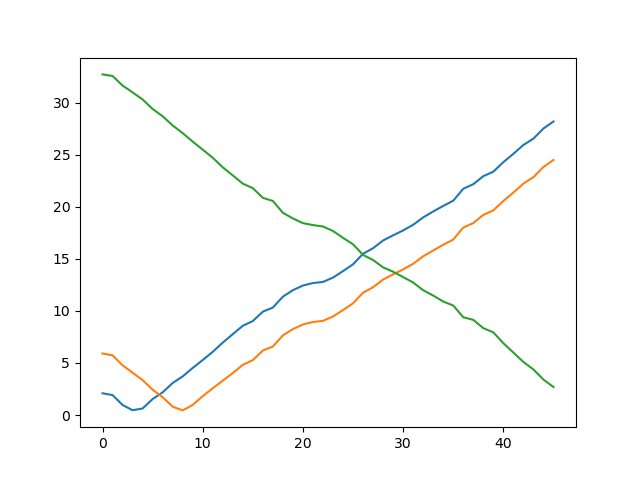

In [58]:
print(distances.shape,gazeGround.shape,footholds[:,2:5].shape)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(distances[0,:])
ax.plot(distances[100,:])
ax.plot(distances[800,:])
plt.show()